请先运行第一块代码以加载求解函数

In [28]:
import numpy as np
from numba import jit


# 求解函数
@jit(nopython=True)
def solver(u, g, n, dx, y, v0):
    v = v0
    t = 0
    dx2 = dx ** 2
    for i in range(n):
        dy = y[i] - y[i + 1]
        ds = (dx ** 2 + dy ** 2) ** 0.5
        sin = dy / ds
        cos = (1 - sin ** 2) ** 0.5
        # 求二阶差商
        if i == 0:
            y2 = (y[i] - 2 * y[i + 1] + y[i + 2]) / dx2
        elif i == n - 1:
            y2 = (y[i - 1] - 2 * y[i] + y[i + 1]) / dx2
        else:
            y2 = 0.5 * (y[i + 2] - y[i + 1] - y[i] + y[i - 1]) / dx2
        # 求曲率k用于计算惯性离心力
        k = y2 / (1 + (dy / dx) ** 2) ** 1.5
        a = g * sin - u * (g * cos + k * v ** 2)
        # 改进欧拉法
        # 第一次迭代期望末速率
        temp = v ** 2 + 2 * a * ds
        if temp <= 0:  # 出不去
            return -1
        v_exp = temp ** 0.5
        # 修正加速度
        a = g * sin - u * (g * cos + k * ((v + v_exp) / 2) ** 2)
        # 第二次迭代期望末速度
        v_exp = (v ** 2 + 2 * a * ds) ** 0.5
        # 微元平均速度
        v_av = (v + v_exp) / 2
        t = t + ds / v_av
        v = v_exp
    return t


# 解说函数
def interpreter(result):
    if result == -1:
        print("不能到达终点")
    else:
        print("用时:", end=' ')
        print(result, end='s')


In [29]:
# 直线情况

# 参数设定
# 摩擦系数
u = 0.09
g = 9.8
# 微元数
n = int(1e5)
# x轴范围
x0 = 800
dx = x0 / n
x = np.linspace(0, x0, num=int(n + 1))
# 轨道方程
y = 1000 - 1.25 * x
# 初速度
v0 = 0
interpreter(solver(u, g, n, dx, y, v0))


用时: 18.991090173598298s

In [30]:
#抛物线情况

# 参数设定
# 摩擦系数
u = 0.09
g = 9.8
# 微元数
n = int(1e5)
# x轴范围
x0 = 800
dx = x0 / n
x = np.linspace(0, x0, num=int(n + 1))
# 轨道方程
y = 1000 * (x - 800) ** 2 / 800 ** 2
# 初速度
v0 = 0
interpreter(solver(u, g, n, dx, y, v0))


用时: 18.057548214249323s

Text(0, 0.5, '1/(T/s)')

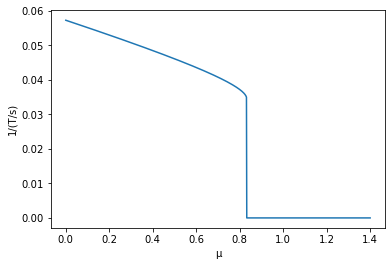

In [32]:
# 研究滑行时间随摩擦系数的变化，请先运行2号或3号代码块
import matplotlib.pyplot as plt

u = np.linspace(0, 1.4, 1000)
t_inv = []
for ui in u:
    t = solver(ui, g, n, dx, y, 0)
    if t == -1:
        t = 0
    else:
        t = 1 / t
    t_inv.append(t)
t_inv = np.array(t_inv)
plt.plot(u, t_inv)
plt.xlabel('μ')
plt.ylabel('1/(T/s)')
